In [17]:
import pandas as pd
import numpy as np
import pickle
import time
import math
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re
import csv


from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', 50)

In [18]:
text = pd.read_csv('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs/AR_600_03_2007.txt', on_bad_lines = 'skip', lineterminator=".", header=None)[0].str.cat().strip()
df = pd.DataFrame([text], columns=['text'])

In [19]:
import os
doc_directory = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs/'
doc_directory = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary/'
doc_files = os.listdir(doc_directory)
doc_texts = []
for file in doc_files:
    if file.endswith(".txt"):
        with open(doc_directory+file, "r") as f:
            doc_texts.append(f.read().replace('\n', ''))

In [23]:
directory_path = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs'
#directory_path = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'
# list of file names in the directory
list_of_files = os.listdir(directory_path)

# initialize an empty dataframe to store the text documents
df = pd.DataFrame(columns=['text'])

In [24]:
for filename in list_of_files:
    file_path = os.path.join(directory_path, filename)
    # check if the path is a file
    if os.path.isfile(file_path):
        # read the contents of the file and append as a new row to the dataframe
        text = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', quoting=csv.QUOTE_NONE, lineterminator='.', header=None)[0].str.cat().strip()
        df = df.append({'text': text}, ignore_index=True)

<ipython-input-24-6964bad9db15>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text}, ignore_index=True)
<ipython-input-24-6964bad9db15>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text}, ignore_index=True)
<ipython-input-24-6964bad9db15>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text}, ignore_index=True)
<ipython-input-24-6964bad9db15>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text}, ignore_index=True)
<ipython-input-24-6964bad9db15>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [25]:
df.head()

,text
0,FM 7-15 2 A bar (│) marks new material 3 File ...
1,ADP622\nARMYLEADERSHI\nP\n\nAUGUST201\n2\n\nDI...
2,I am extremely satisfied with my marriage\nI a...
3,FM 25-101 Table of Contents RDL Document Downl...
4,Acquire sensors to see more\nConcentrate highl...


In [26]:
# GPT-2 or XLNet model

In [27]:
df = df.replace(r'\n',' ', regex=True)
# https://medium.com/@armandj.olivares/using-bert-for-classifying-documents-with-long-texts-5c3e7b04573d

In [28]:
df.head()

,text
0,FM 7-15 2 A bar (│) marks new material 3 File ...
1,ADP622 ARMYLEADERSHI P AUGUST201 2 DI STRI B...
2,I am extremely satisfied with my marriage I am...
3,FM 25-101 Table of Contents RDL Document Downl...
4,Acquire sensors to see more Concentrate highly...


In [29]:
df = df.replace ('', ' ', regex = True)

In [30]:

#df['text'] = df['text'].apply(lambda x: ''.join(filter(lambda y: ord(y) < 128, x)))
import unicodedata
df['text'] = df['text'].apply(lambda x: ''.join([' ' if not unicodedata.normalize('NFKD', char).encode('ASCII', 'ignore') else char for char in x]))


In [31]:
df.head()

,text
0,FM 7-15 2 A bar ( ) marks new material 3 File ...
1,ADP622 ARMYLEADERSHI P AUGUST201 2 DI STRI B...
2,I am extremely satisfied with my marriage I am...
3,FM 25-101 Table of Contents RDL Document Downl...
4,Acquire sensors to see more Concentrate highly...


In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer# Load the BERT tokenizer
from transformers import *
# tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# # Load the BERT model
model = TFAutoModel.from_pretrained("bert-base-cased")
# max_seq_length = 512
model_name = 'bert-base-uncased'
bert_model = TFAutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

loading configuration file config.json from cache at /home/seh6fy/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file tf_model.h5 from cache at /home/seh6fy/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/tf_mode

In [33]:
def encode_document(text, max_tokens=10):
    input_ids = tokenizer.encode(text, max_length=max_tokens, truncation=True, add_special_tokens=True, return_tensors="tf")
    outputs = model(input_ids)
    last_hidden_state = outputs.last_hidden_state
    document_embedding = tf.reduce_mean(last_hidden_state, axis=1)
    return document_embedding.numpy().squeeze()

vectors = df['text'].apply(lambda x: encode_document(str(x)))
output_vectors = pd.DataFrame(vectors.tolist())

# Write the output vectors to a csv file
output_vectors.to_csv('output_vectors.csv', index=False)


In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
doc_names = []
for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs'):
#for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])
# Reduce the dimensionality of the vectors using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)
for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)
# Plot the vectors
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

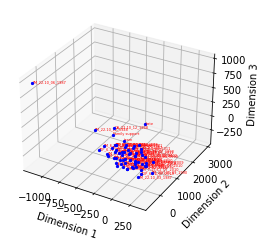

In [37]:
import os
from sklearn.manifold import TSNE
doc_names = []
for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs'):
#for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])

tsne = TSNE(n_components=3, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)

# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)
    
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Save the plot as a PDF file
# plt.savefig('plot.pdf')
plt.savefig('plot.pdf')
plt.show()




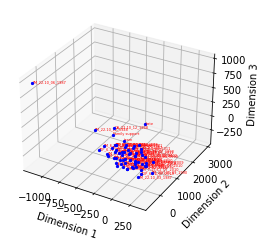

In [40]:
import os
from sklearn.manifold import TSNE

doc_names = []

for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs'):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])

tsne = TSNE(n_components=3, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)

np.savetxt('vectors_tsne.csv', vectors_tsne, delimiter=',')



# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Save the plot as a PDF file
# plt.savefig('plot.pdf')
plt.savefig('plot.pdf')
plt.show()
